In [2]:
from __future__ import print_function
from vowpalwabbit import pyvw

In [42]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# Generate the model
N = 1000
F = 10
W = rnd.randn(F, 1)
b = -3 + rnd.randn()


In [112]:
# Generate sample input
X = rnd.randn(N, F)
y = np.dot(X, W) + b

(array([  3.,  29.,  67., 148., 213., 210., 179.,  99.,  45.,   7.]),
 array([-12.42114968, -10.80759958,  -9.19404948,  -7.58049938,
         -5.96694927,  -4.35339917,  -2.73984907,  -1.12629896,
          0.48725114,   2.10080124,   3.71435134]),
 <a list of 10 Patch objects>)

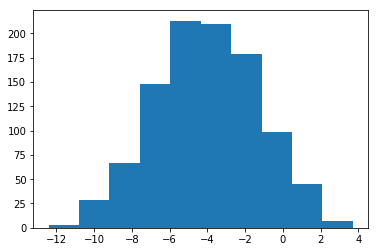

In [117]:
plt.hist(y)
plt.title('histogram of responses')

In [113]:
# Convert sample into VW input
def generate_vw(X, y):
    samples = []
    for i in xrange(X.shape[0]):
        example = "{} |".format(y[i, 0])
        for f in xrange(X.shape[1]):
            example += " {}:{}".format(f, X[i,f])
        samples.append(example)
    return samples
generate_vw(X[0:2,:],y[0:2])

['-5.69215512759 | 0:0.908421394782 1:-1.93307437248 2:-1.04477880726 3:-0.92118705495 4:-0.712568616243 5:-0.0899610577083 6:-0.439611666365 7:-0.241854614939 8:-0.115180184774 9:-1.90492813939',
 '-6.85625554568 | 0:0.187406416945 1:0.487893701608 2:-2.5629397207 3:-0.443167236017 4:0.2016670517 5:-1.40134881528 6:0.714837541803 7:0.628386042758 8:-1.60735436167 9:-0.360543605055']

In [114]:
# Example usage
vw = pyvw.vw()
ex = vw.example('-2.12194045634 | 0:-0.0774179384037 1:-1.0758415077 2:-1.02732013379 3:-0.998411818093 4:-0.636798702701 5:-2.02201140179 6:-0.646318191321 7:1.06557030959 8:0.257035057903 9:-0.260060991714')
ex.learn()
vw.predict(ex)

-1.1506720781326294

In [115]:
# Run stochastic gradient descent
ITER = 10
vw = pyvw.vw('--loss_function=squared -l 0.1') 
samples = generate_vw(X,y)
iter_loss = []
predictions = []
for iteration in xrange(ITER):
    predictions = []
    loss  = 0
    for i in xrange(len(samples)):
        ex = vw.example(samples[i])
        ex.learn()
        predictions.append(vw.predict(ex))
        loss += np.square(y[i, 0]-vw.predict(ex))
    iter_loss.append(loss/N)

As promised there is documentation; for instance:

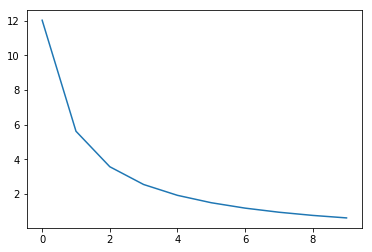

In [94]:
plt.plot(iter_loss)


Let's run that learn function and get a prediction:

Text(0.5,1,'Predictions vs. Actual')

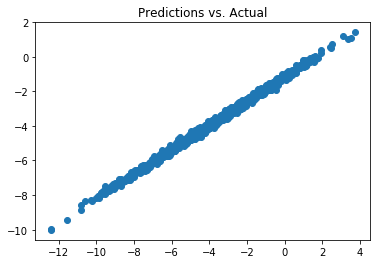

In [118]:
plt.scatter(y[:,0], predictions)
plt.title('Predictions vs. Actual')

Text(0.5,1,'Predicted vs. Actual weight')

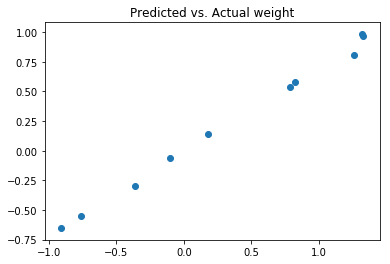

In [116]:
What = [vw.get_weight(i) for i in xrange(F)]
plt.scatter(W[:, 0], What)
plt.title('Predicted vs. Actual weight')